In [1]:
from keras.models import load_model

model = load_model('models/modelkubaru4.keras')
print("Model loaded successfully.")

Model loaded successfully.


In [2]:
nama_ikan = {
    "Abramis brama": "Abramis brama",
    "Acipenseridae": "Ikan Sturgeon",
    "Anguilla anguilla": "Belut Eropa",
    "Aspius aspius": "Asp",
    "Barbus barbus": "Barbel",
    "Barrel Jellyfish": "Ubur-Ubur Tong",
    "Blicca bjoerkna": "Blicca bjoerkna",
    "Blue Jellyfish": "Ubur-Ubur Biru",
    "Carassius carassius": "Ikan Mas",
    "Carassius gibelio": "Ikan Mas Prusia",
    "Catfish": "Ikan Lele",
    "Chanos Chanos": "Bandeng",
    "Compass Jellyfish": "Ubur-Ubur Kompas",
    "Ctenopharyngodon idella": "Grass Carp",
    "Cupang": "Cupang",
    "Cyprinus carpio": "Koi / Ikan Mas",
    "Discus": "Discus",
    "Eleutheronema Tetradactylum": "Senangin",
    "Esox lucius": "Northern Pike",
    "Gasterosteus aculeatus": "Three-Spined Stickleback",
    "Gobio gobio": "Gudgeon",
    "Guppy": "Gupi",
    "Gymnocephalus cernuus": "Ruffe",
    "Johnius Trachycephalus": "Jahan",
    "Lemonfish": "Lemonfish",
    "Lepomis gibbosus": "Pumpkinseed",
    "Leuciscus cephalus": "Chub",
    "Leuciscus idus": "Ide",
    "Leuciscus leuciscus": "Dace",
    "Lions Mane Jellyfish": "Ubur-Ubur Singa",
    "Lohan": "Louhan",
    "Manfish": "Manfish",
    "Maskoki": "Ikan Mas Koki",
    "Mauve Stinger Jellyfish": "Ubur-Ubur Mauve Stinger",
    "Molly": "Moli",
    "Moon Jellyfish": "Ubur-Ubur Bulan",
    "Neogobius fluviatilis": "Monkey Goby",
    "Neogobius kessleri": "Bighead Goby",
    "Neogobius melanostomus": "Round Goby",
    "NeonTetra": "Neon Tetra",
    "Nibea Albiflora": "Kurisi",
    "Oreochromis Mossambicus": "Mujair",
    "Oreochromis Niloticus": "Nila",
    "Osphronemus Goramy": "Gurame",
    "Perca fluviatilis": "Perch",
    "Rastrelliger Faughni": "Kembung Faughni",
    "Rhodeus amarus": "Bitterling",
    "Rutilus rutilus": "Roach",
    "Salmo trutta subsp. fario": "Brown Trout",
    "Sander lucioperca": "Zander",
    "Sapusapu": "Sapusapu",
    "Scardinius erythrophthalmus": "Rudd",
    "Silurus glanis": "Lele Eropa",
    "Tinca tinca": "Tench",
    "Upeneus Moluccensis": "Ekor Kuning",
    "Vimba vimba": "Vimba",
    "Zebra": "Ikan Zebra"
}


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediksi: Ikan Lele (Catfish) dengan probabilitas 0.98


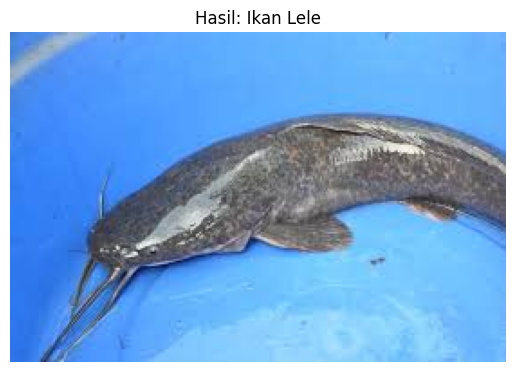

In [3]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import json

# Load class indices
with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)

# Buat class_labels berdasarkan urutan indeks
class_labels = [None] * len(class_indices)
for class_name, index in class_indices.items():
    class_labels[index] = class_name


def prepare_image(img_path, img_size):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Path gambar dan ukuran input model
img_path = 'ikan.png'
IMG_SIZE = (224, 224)
img_input = prepare_image(img_path, IMG_SIZE)

# Prediksi
pred = model.predict(img_input)[0]
predicted_class_idx = np.argmax(pred)
predicted_class = class_labels[predicted_class_idx]
nama_indonesia = nama_ikan.get(predicted_class, "Tidak diketahui")
predicted_prob = pred[predicted_class_idx]

# Output
print(f"Prediksi: {nama_indonesia} ({predicted_class}) dengan probabilitas {predicted_prob:.2f}")
plt.imshow(image.load_img(img_path))
plt.title(f"Hasil: {nama_indonesia}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Prediksi: Ikan Lele (Catfish)
Probabilitas: 0.98
Habitat: Sungai, rawa, dan kolam
Keamanan Konsumsi: Aman dikonsumsi


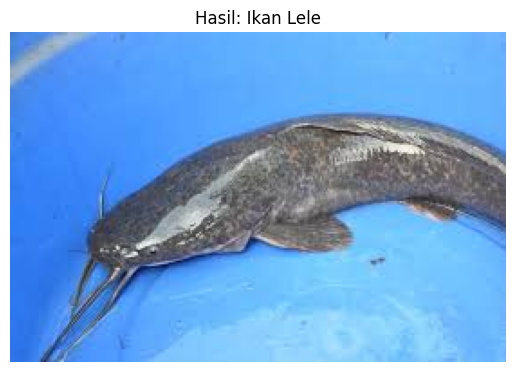

In [4]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import json

def prepare_image(img_path, img_size):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalisasi
    return img_array

# === Load Informasi Tambahan dari JSON ===
with open('fish_info.json', 'r') as f:
    fish_info = json.load(f)

# === Load class indices dari file JSON ===
with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)

# Urutkan label sesuai index
class_labels = [None] * len(class_indices)
for label, idx in class_indices.items():
    class_labels[idx] = label

# === Path Gambar dan Ukuran Input Model ===
img_path = 'ikan.png'  # Ganti sesuai kebutuhan
IMG_SIZE = (224, 224)
img_input = prepare_image(img_path, IMG_SIZE)

# === Prediksi dari Model ===
pred = model.predict(img_input)[0]
predicted_class_idx = np.argmax(pred)
predicted_prob = pred[predicted_class_idx]
predicted_class = class_labels[predicted_class_idx]

# === Ambil Data dari JSON ===
info = fish_info.get(predicted_class, {})
nama_indo = info.get("nama_indonesia", "Tidak diketahui")
habitat = info.get("habitat", "Data habitat tidak tersedia")
konsumsi = info.get("konsumsi", "Data konsumsi tidak tersedia")

# === Cetak Hasil ===
print(f"Prediksi: {nama_indo} ({predicted_class})")
print(f"Probabilitas: {predicted_prob:.2f}")
print(f"Habitat: {habitat}")
print(f"Keamanan Konsumsi: {konsumsi}")

# === Tampilkan Gambar Hasil ===
plt.imshow(image.load_img(img_path))
plt.title(f"Hasil: {nama_indo}")
plt.axis('off')
plt.show()
